# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [125]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [126]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [127]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [128]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [129]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [130]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [131]:
df.describe()

ine_code    new_cases          PCR        TestAc       activos  \
count  18362.000000  5837.000000  4856.000000   1292.000000   1975.000000   
mean      26.504684    93.356347   135.622995   8094.167183   1306.346835   
std       15.009396   173.535681   304.865520  22366.246978   1693.030862   
min        1.000000   -67.000000   -67.000000      0.000000      0.000000   
25%       14.000000     7.000000     9.000000      2.000000    225.500000   
50%       27.000000    36.000000    53.000000     12.000000    662.000000   
75%       40.000000    95.000000   142.000000    318.000000   1687.000000   
max       52.000000  1992.000000  4423.000000  83823.000000  14617.000000   

       hospitalized  intensive_care      deceased  cases_accumulated  \
count  12643.000000    12506.000000  13899.000000        8968.000000   
mean     198.723088       29.584360    672.965681       10179.836418   
std      712.046883       85.618598   1936.297069       22838.060143   
min        0.000000        0.000000      0.000000           0.000000   
25%       17.000000        3.000000    110.000000        1093.000000   
50%       64.000000       10.000000    240.000000        3088.500000   
75%      168.000000       28.000000    445.000000        9174.750000   
max    15227.000000     1528.000000  13944.000000      252228.000000   

       cases_accumulated_PCR     recovered  deceased_hosp_eus     num_casos  \
count            9974.000000   8728.000000         585.000000  18304.000000   
mean            13116.697313   3286.325488         391.068376     96.609320   
std             39000.164365   6158.913739         243.192336    285.840565   
min                 0.000000      0.000000         130.000000      0.000000   
25%              1704.000000    520.750000         219.000000      1.000000   
50%              3871.000000   1467.000000         285.000000     16.000000   
75%              8447.750000   3010.000000         594.000000     87.000000   
max            386055.000000  66506.000000        1000.000000   6758.000000   

       num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_otras  \
count          18304.000000              18304.000000            18304.000000   
mean              86.040975                  0.256010               10.200066   
std              265.365672                  1.473441               54.485291   
min                0.000000                  0.000000                0.000000   
25%                1.000000                  0.000000                0.000000   
50%               15.000000                  0.000000                0.000000   
75%               78.000000                  0.000000                1.000000   
max             6744.000000                 32.000000             1164.000000   

       num_casos_prueba_desconocida     poblacion  cases_per_cienmil  \
count                  18304.000000  1.836200e+04        8968.000000   
mean                       0.112271  9.043632e+05         960.352857   
std                        1.322587  1.176689e+06        1188.644978   
min                        0.000000  8.477700e+04           0.000000   
25%                        0.000000  3.167980e+05         165.045000   
50%                        0.000000  5.810780e+05         478.725000   
75%                        0.000000  1.032983e+06        1243.500000   
max                       65.000000  6.663394e+06        5945.270000   

       intensive_care_per_1000000  deceassed_per_100000  \
count                12506.000000          13899.000000   
mean                     3.281945             64.417031   
std                      3.857547             57.553265   
min                      0.000000              0.000000   
25%                      0.550000             15.710000   
50%                      1.960000             44.720000   
75%                      4.720000            105.310000   
max                     28.720000            262.220000   

       hospitalized_per_100000  cases_14days 

y un muestreo de valores y de algunas columnas de interés:

In [132]:
df.head()

date          province  ine_code                     ccaa  new_cases  \
0  2020-01-01          Albacete         2     Castilla - La Mancha        NaN   
1  2020-01-01  Alicante/Alacant         3     Comunitat Valenciana        NaN   
2  2020-01-01           Almería         4                Andalucía        NaN   
3  2020-01-01       Araba/Álava         1               País Vasco        NaN   
4  2020-01-01          Asturias        33  Asturias, Principado de        NaN   

   PCR  TestAc  activos  hospitalized  intensive_care  deceased  \
0  NaN     NaN      NaN           NaN             NaN       NaN   
1  NaN     NaN      NaN           NaN             NaN       NaN   
2  NaN     NaN      NaN           NaN             NaN       NaN   
3  NaN     NaN      NaN           NaN             NaN       NaN   
4  NaN     NaN      NaN           NaN             NaN       NaN   

   cases_accumulated  cases_accumulated_PCR  recovered  deceased_hosp_eus  \
0                NaN                    NaN        NaN                NaN   
1                NaN                    NaN        NaN                NaN   
2                NaN                    NaN        NaN                NaN   
3                NaN                    NaN        NaN                NaN   
4                NaN                    NaN        NaN                NaN   

   num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
0        0.0                   0.0                       0.0   
1        0.0                   0.0                       0.0   
2        0.0                   0.0                       0.0   
3        0.0                   0.0                       0.0   
4        0.0                   0.0                       0.0   

   num_casos_prueba_otras  num_casos_prueba_desconocida  poblacion  \
0                     0.0                           0.0     388167   
1                     0.0                           0.0    1858683   
2                     0.0                           0.0     716820   
3                     0.0                           0.0     331549   
4                     0.0                           0.0    1022800   

   cases_per_cienmil  intensive_care_per_1000000  deceassed_per_100000  \
0                NaN                         NaN                   NaN   
1                NaN                         NaN                   NaN   
2                NaN                         NaN                   NaN   
3                NaN                         NaN                   NaN   
4                NaN                         NaN                   NaN   

   hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
0                      NaN           NaN          NaN               NaN   
1                      NaN           NaN          NaN               NaN   
2                      NaN           NaN          NaN               NaN   
3                      NaN           NaN          NaN               NaN   
4                      NaN           NaN          NaN               NaN   

   cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
0              NaN          NaN               NaN              NaN   
1              NaN          NaN               NaN              NaN   
2              NaN          NaN               NaN              NaN   
3              NaN          NaN               NaN              NaN   
4              NaN          NaN               NaN              NaN   

   daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
0                   NaN           NaN                    NaN   
1                   NaN           NaN                    NaN   
2                   NaN           NaN                    NaN   
3                   NaN           NaN                    NaN   
4                   NaN           NaN                    NaN   

   daily_deaths_inc  daily_deaths_avg3  daily_deaths_avg7  \
0               NaN                NaN                NaN   
1               NaN       

In [133]:
df.tail()

date           province  ine_code                  ccaa  \
18357  2020-12-19            Segovia        40       Castilla y León   
18358  2020-12-19              Soria        42       Castilla y León   
18359  2020-12-19  Valencia/València        46  Comunitat Valenciana   
18360  2020-12-19         Valladolid        47       Castilla y León   
18361  2020-12-19             Zamora        49       Castilla y León   

       new_cases  PCR  TestAc  activos  hospitalized  intensive_care  \
18357       15.0  NaN     NaN      NaN           5.0             4.0   
18358        1.0  NaN     NaN      NaN          14.0             5.0   
18359     1166.0  NaN     NaN      NaN           NaN             NaN   
18360       51.0  NaN     NaN      NaN          87.0            48.0   
18361       15.0  NaN     NaN      NaN          56.0             8.0   

       deceased  cases_accumulated  cases_accumulated_PCR  recovered  \
18357     262.0                NaN                 8212.0     1206.0   
18358     175.0                NaN                 5793.0      736.0   
18359       NaN            71403.0                    NaN        NaN   
18360     803.0                NaN                30909.0     4632.0   
18361     320.0                NaN                 8680.0     1351.0   

       deceased_hosp_eus  num_casos  num_casos_prueba_pcr  \
18357                NaN        NaN                   NaN   
18358                NaN        NaN                   NaN   
18359                NaN        NaN                   NaN   
18360                NaN        NaN                   NaN   
18361                NaN        NaN                   NaN   

       num_casos_prueba_test_ac  num_casos_prueba_otras  \
18357                       NaN                     NaN   
18358                       NaN                     NaN   
18359                       NaN                     NaN   
18360                       NaN                     NaN   
18361                       NaN                     NaN   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
18357                           NaN     153129                NaN   
18358                           NaN      88636                NaN   
18359                           NaN    2565124            2783.61   
18360                           NaN     519546                NaN   
18361                           NaN     172539                NaN   

       intensive_care_per_1000000  deceassed_per_100000  \
18357                        2.61                171.10   
18358                        5.64                197.44   
18359                         NaN                   NaN   
18360                        9.24                154.56   
18361                        4.64                185.47   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
18357                     3.27           NaN          NaN             207.0   
18358                    15.79           NaN          NaN             101.0   
18359                      NaN           NaN          NaN               NaN   
18360                    16.75           NaN          NaN             992.0   
18361                    32.46           NaN          NaN             383.0   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
18357            106.0         15.0              15.1             15.0   
18358             49.0          1.0               7.0              1.0   
18359              NaN       1166.0            1203.0              NaN   
18360            358.0         51.0              50.7             51.0   
18361            173.0         15.0              24.7             15.0   

       daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
18357                  15.1           0.0                    NaN   
18358                   7.0           1.0                    NaN   
18359                   NaN           NaN                    NaN   
18360                  51.1   

In [134]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [135]:
df['date']=pd.to_datetime(df['date'])

In [136]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered',
       'deceased_hosp_eus', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_otras',
       'num_casos_prueba_desconocida', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7', 'daily_deaths_avg7_hosp_eus',
       'deaths_last_week', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source', 'comments'],
      dtype='object')

In [137]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

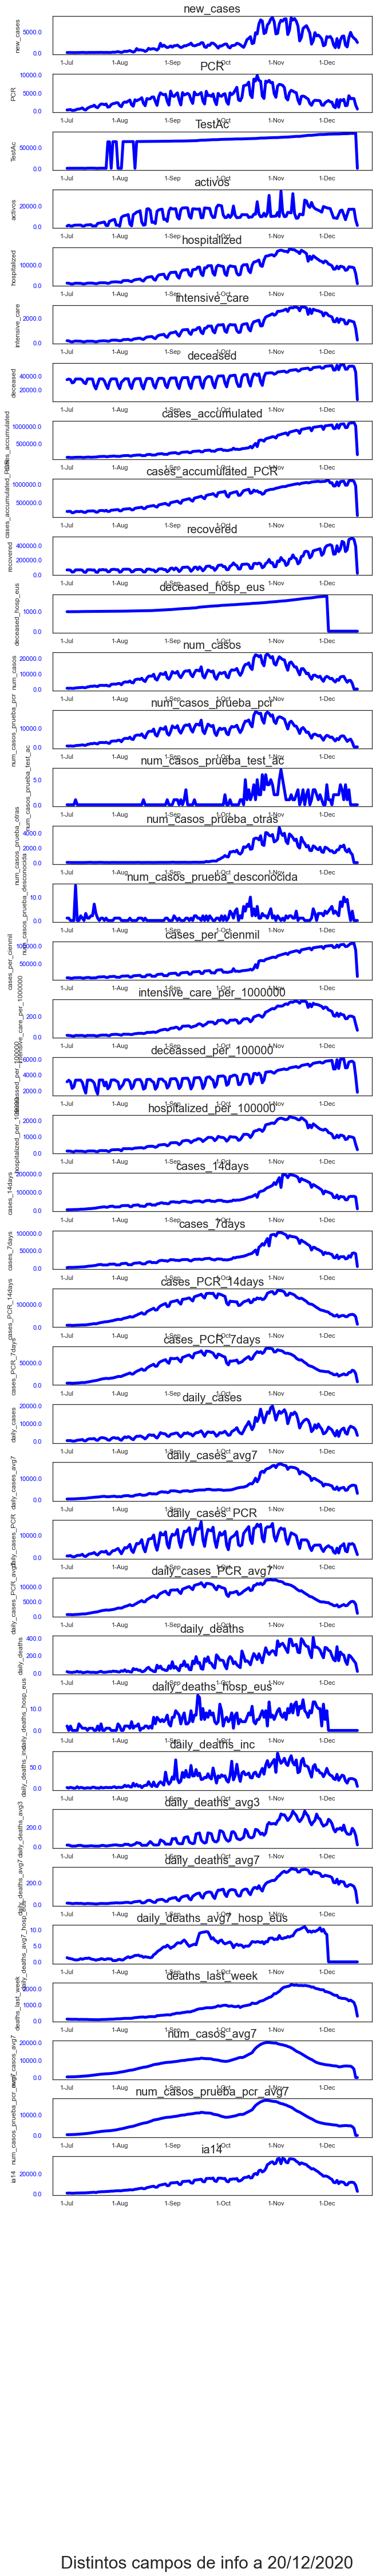

In [138]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [139]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'lightblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
casos_nuevos_aragon = 'casos_nuevos_aragon'
casos_nuevos_paisvasco = 'casos_nuevos_paisvasco'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
aragon = ['Zaragoza','Huesca','Teruel']
pais_vasco=['Bizkaia','Araba/Álava','Gipuzkoa']
for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in aragon:
    datos.loc[datos['province']==provincia,casos_nuevos_aragon]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in pais_vasco:
    datos.loc[datos['province']==provincia,casos_nuevos_paisvasco]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']   
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


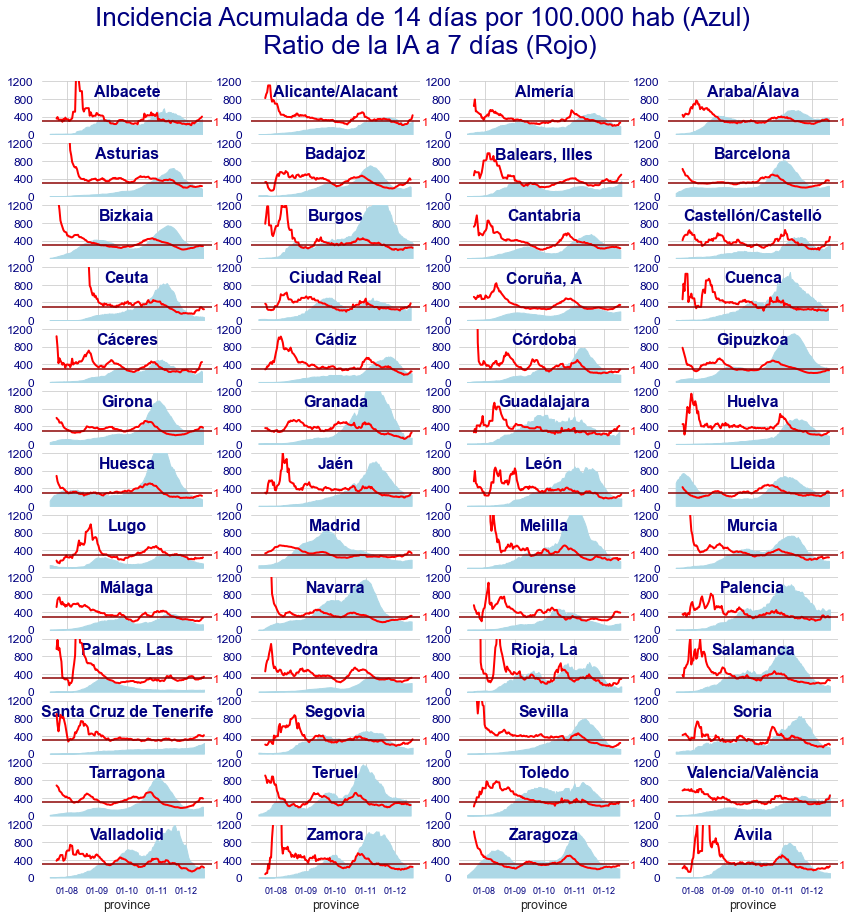

In [140]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
    ax1.set_ylim(0,1200)
    ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    ax1.grid(True)
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [141]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]
    
    y_max = datos_[AI].max()
    
    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%b')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1500)
        #ponemos limites variables dependiendo del maximo valor truncado a 100
        ax1.set_ylim(0,(y_max//100+1)*100)
        ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4)
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

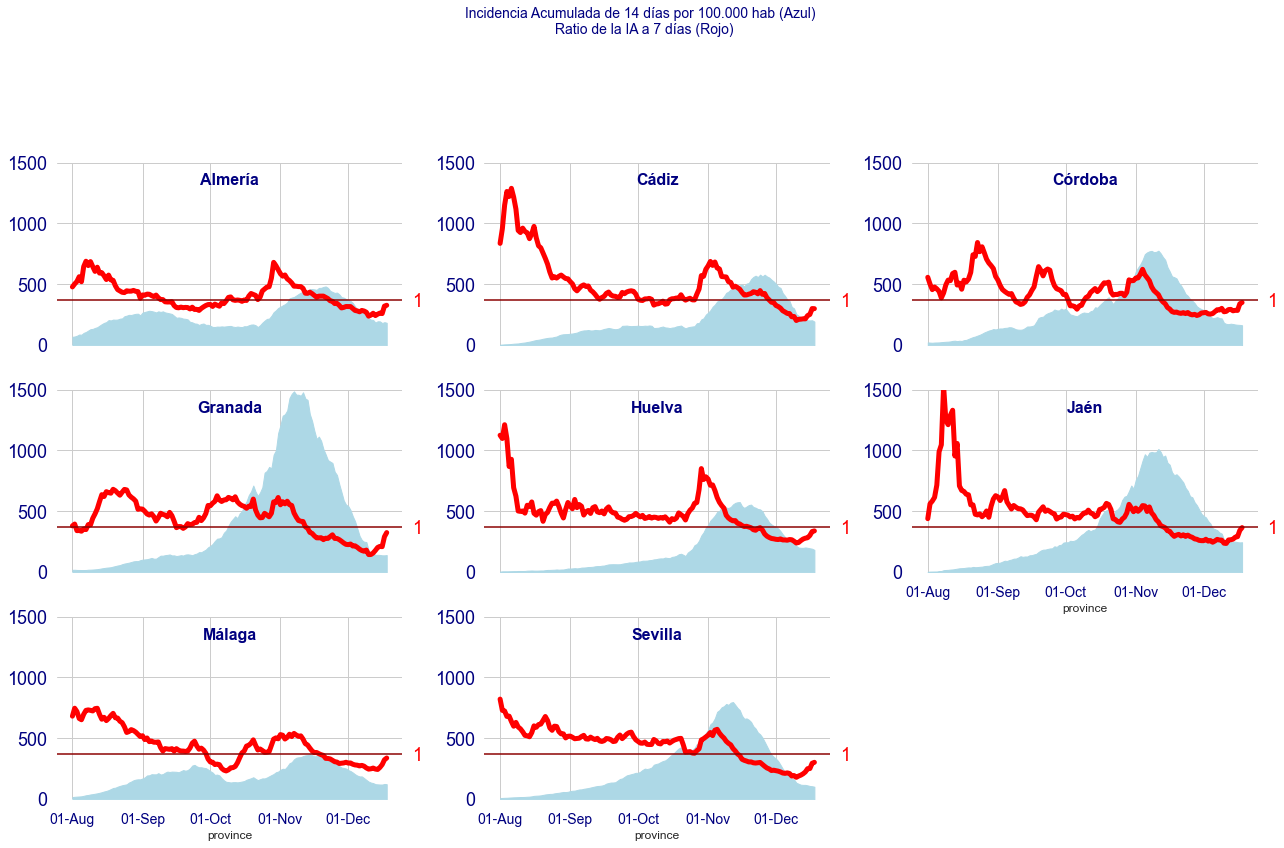

In [142]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

<Figure size 720x360 with 0 Axes>

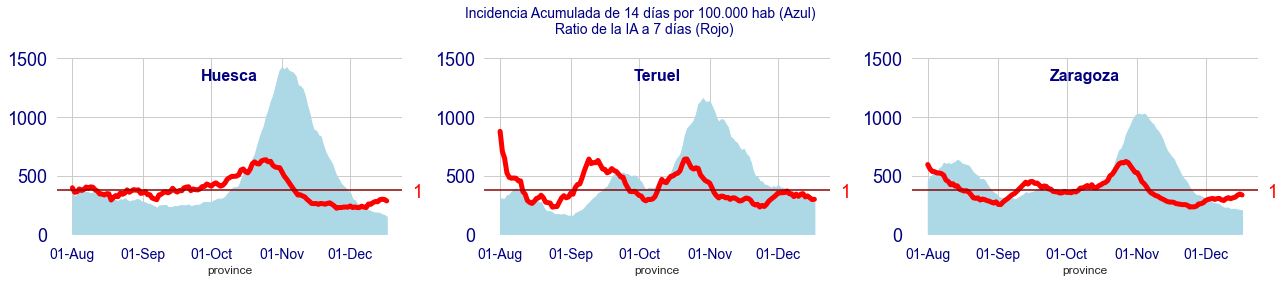

In [143]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon')

<Figure size 720x360 with 0 Axes>

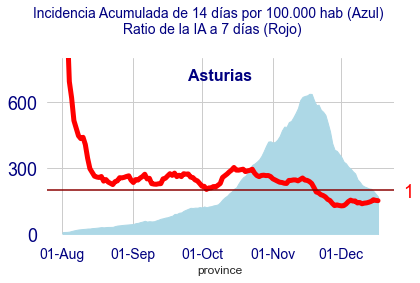

In [144]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

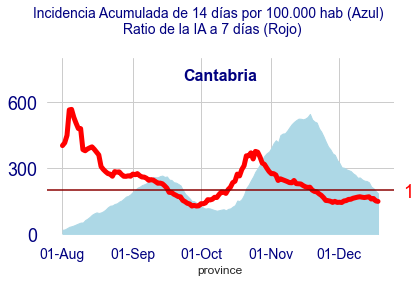

In [145]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria')

<Figure size 720x360 with 0 Axes>

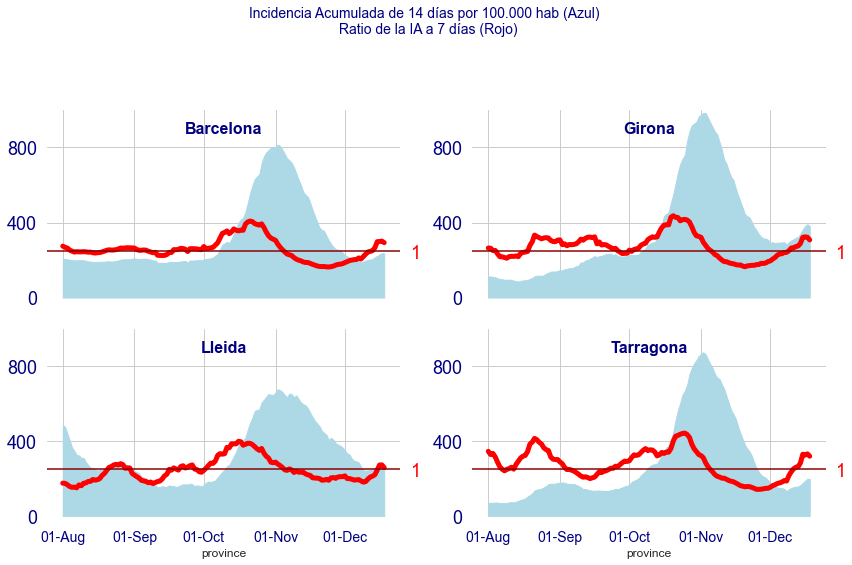

In [146]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

<Figure size 720x360 with 0 Axes>

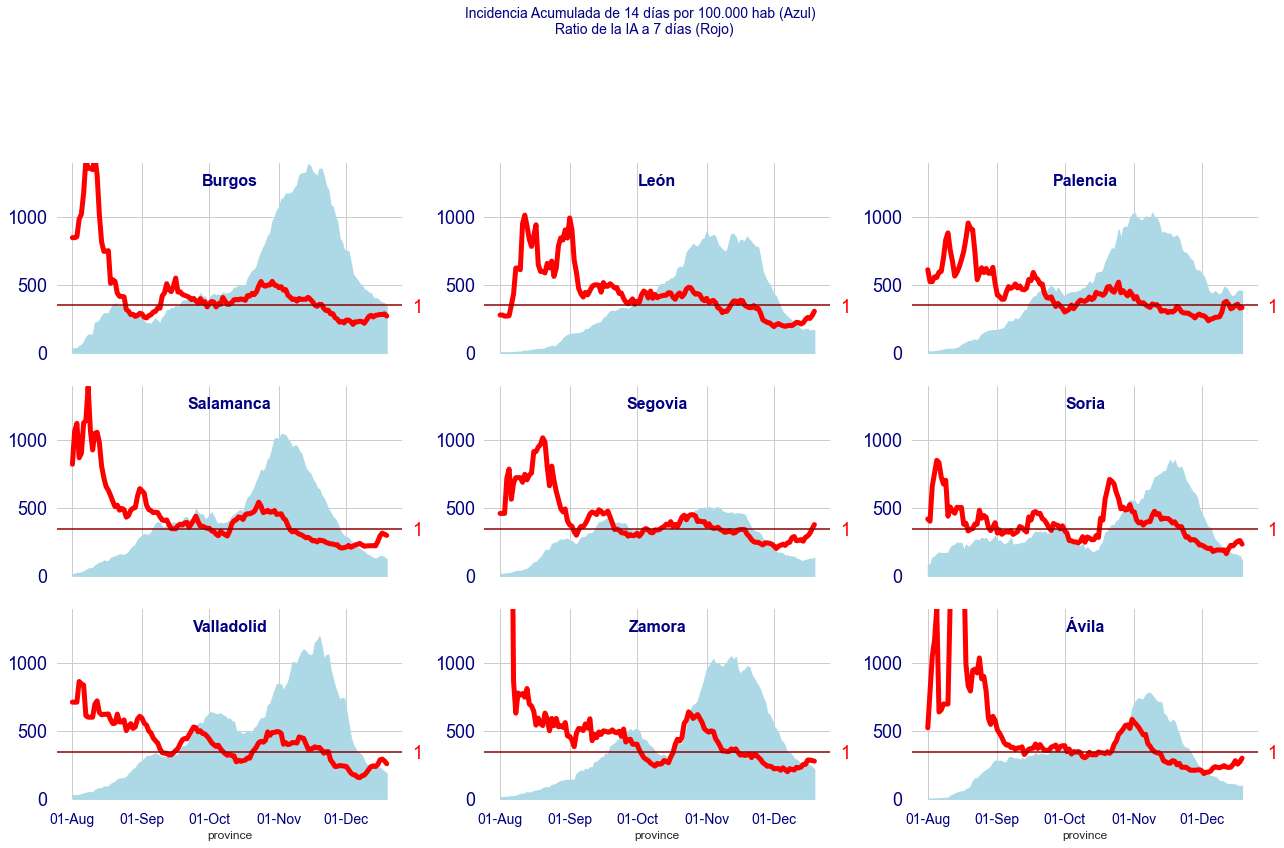

In [147]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon')

<Figure size 720x360 with 0 Axes>

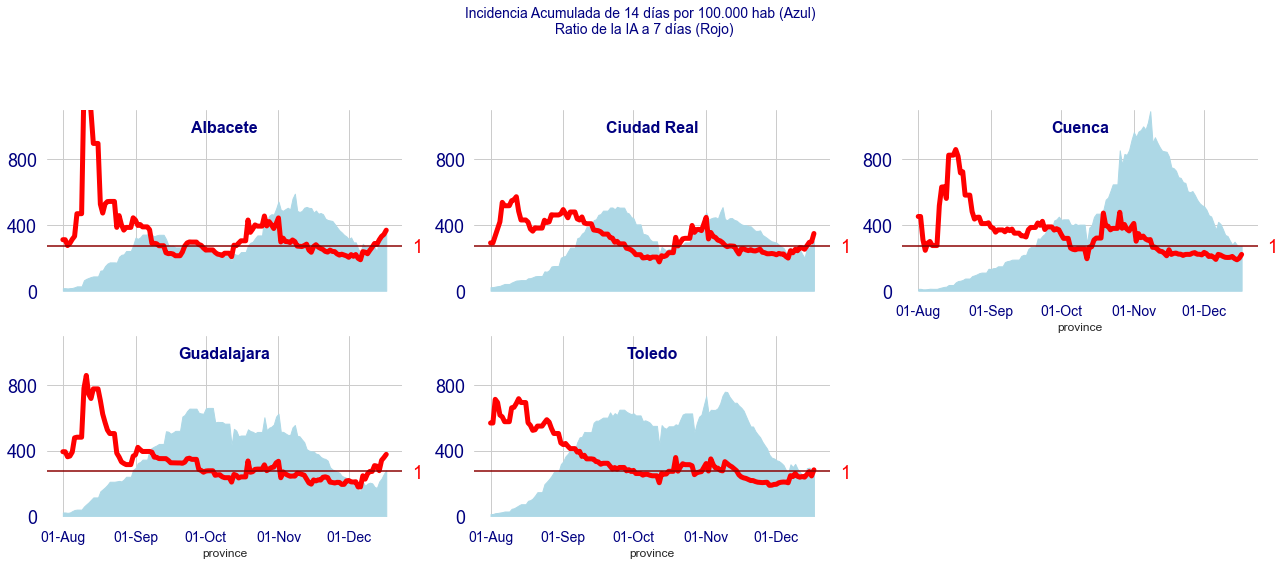

In [148]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha')

<Figure size 720x360 with 0 Axes>

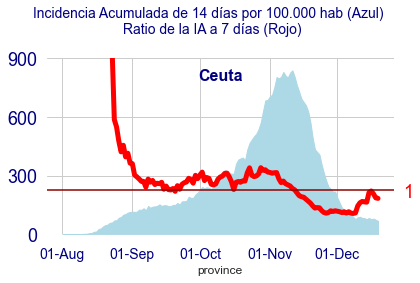

In [149]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta')

<Figure size 720x360 with 0 Axes>

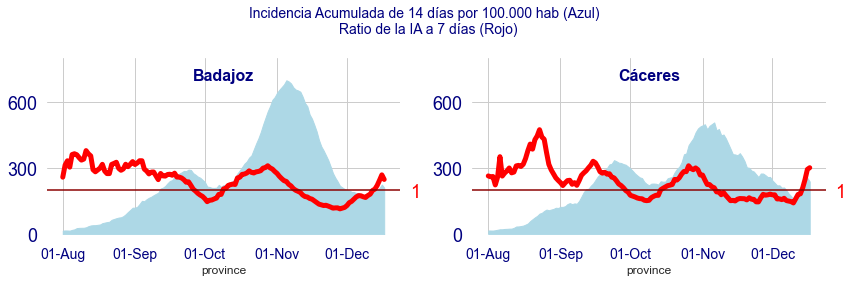

In [150]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

<Figure size 720x360 with 0 Axes>

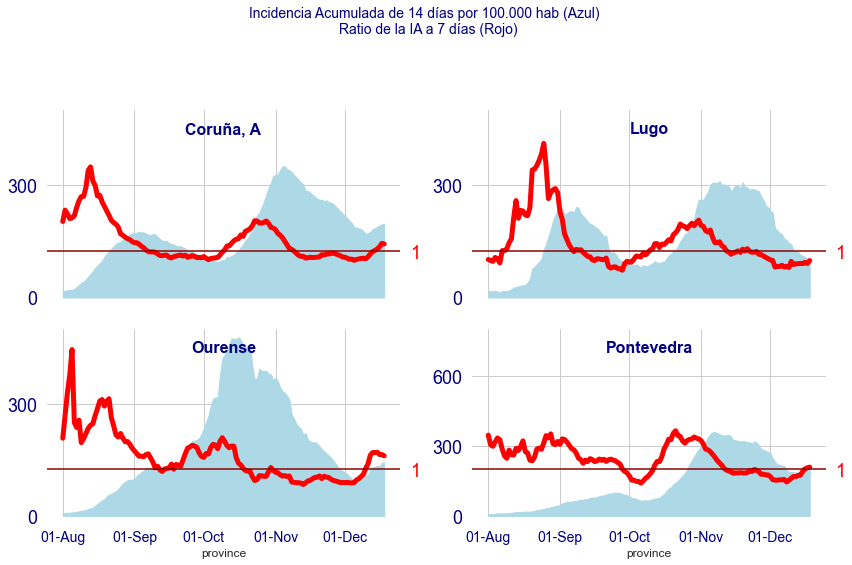

In [151]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

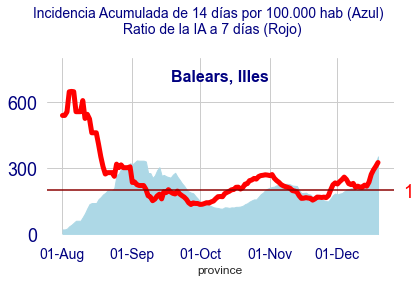

In [152]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

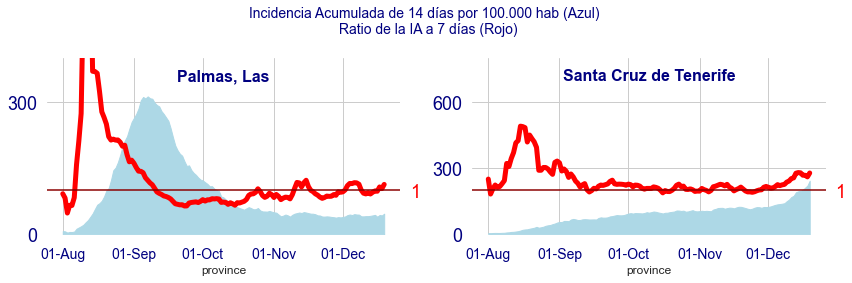

In [153]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

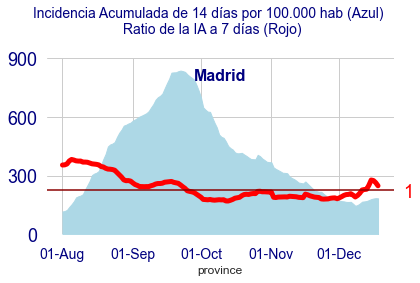

In [154]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

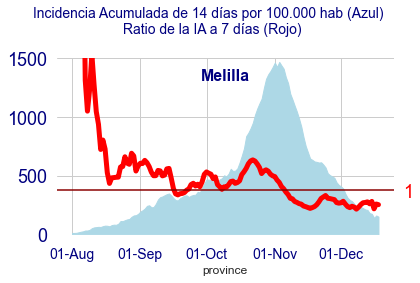

In [155]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

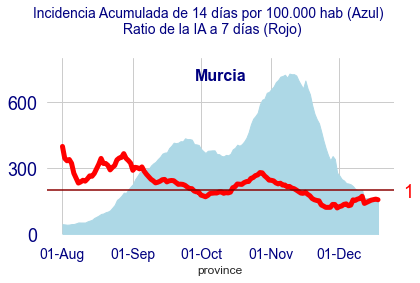

In [156]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

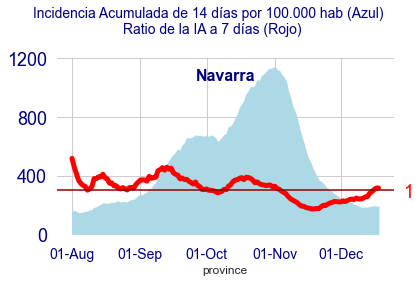

In [157]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

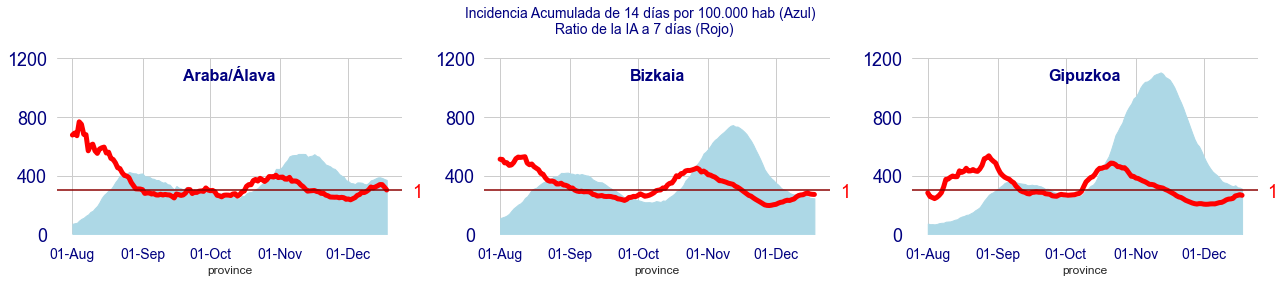

In [158]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

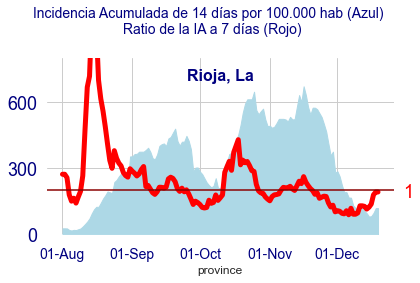

In [159]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

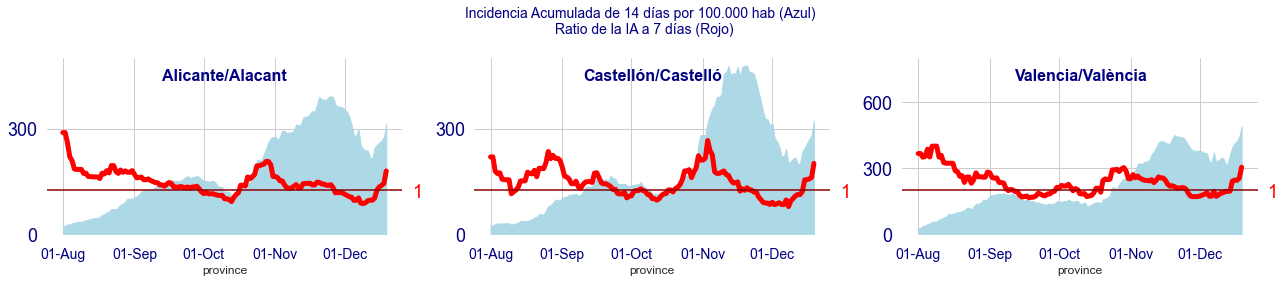

In [160]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

# Gráficos Hospitalizados

In [161]:
def grafico_hospitalizados (datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    hospitalizados = 'hospitalized_per_100000'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1000)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/hospit_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

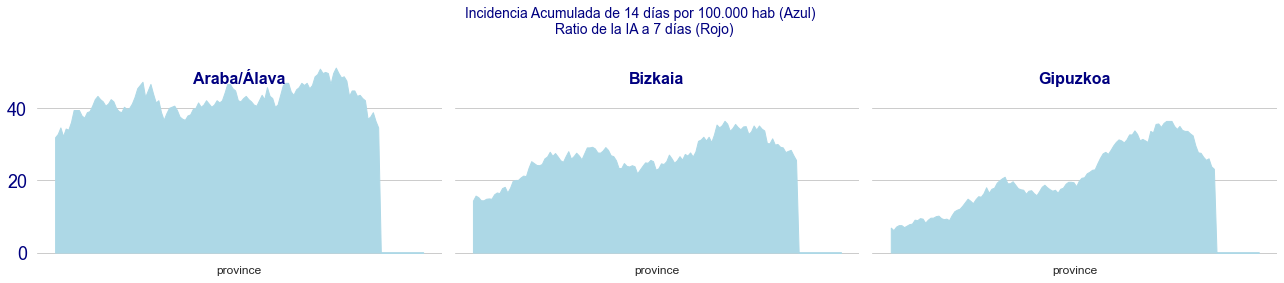

In [162]:
grafico_hospitalizados(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

# Multi provincia con Hospitalizados

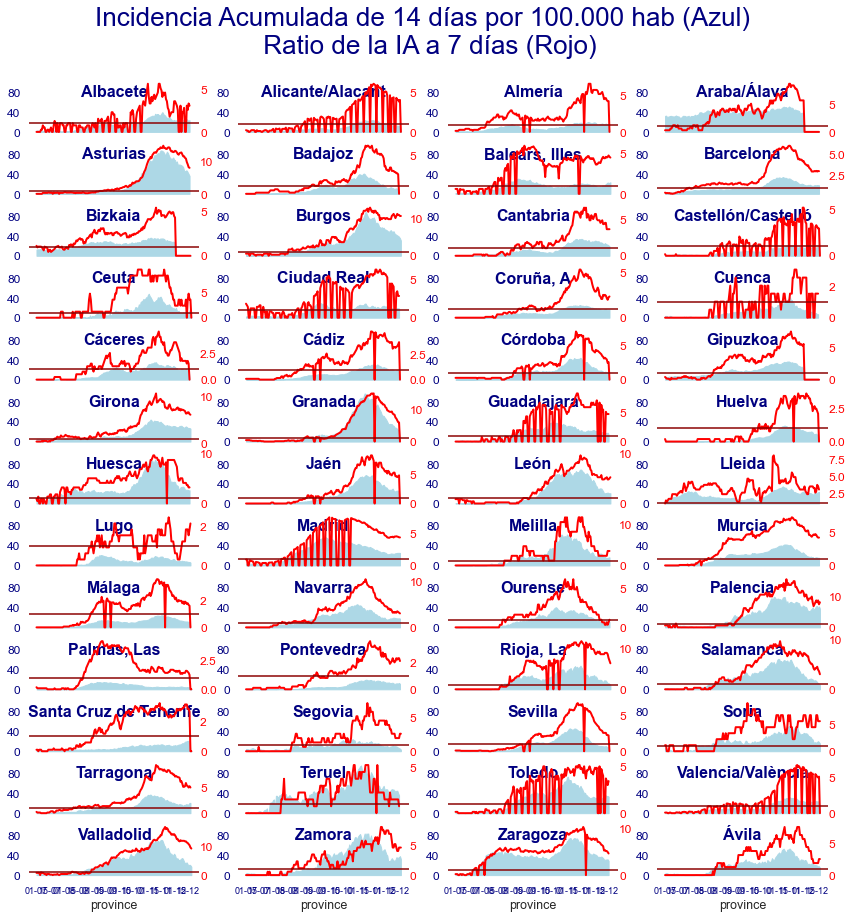

In [163]:

#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título

hospitalizados = 'hospitalized_per_100000'
uci ='intensive_care_per_1000000'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
    #ax1.set_ylim(0,1200)
    #ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[uci], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/hosp_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


In [164]:
def grafico_IA14_ratio_vs(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    color_tags = 'navy'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (EjeX) \n Ratio de la IA a 7 días (EjeY)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    #diccionario con el tamaño de los textos dependiendo del numero de columnas:
    #key=nº columnas, values=(tamaño titulos, nombre provincia, tamaño tags,ratio)
    
    text_size={1:(16,16,12,2),2:(22,20,14,2),3:(24,24,16,1.5)}
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(15,15))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', 
                      margin_titles=False, col_wrap=columnas,aspect=text_size[columnas][3], 
                      height=5.0, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    
    x_min = datos_[AI].min()
    x_max = ((datos_[AI].max() // 100)+1)*100
    y_min = datos_[clave_ratio].min()
    y_max = ((datos_[clave_ratio].max() // .5)+1)*.5
    if (y_max != y_max) or (y_max>3):
        y_max = 2
    print (columnas, y_max)
    
    
    def grafica(x, color, label):
        
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        colores1 = sns.color_palette("Blues",df_datos.shape[0])
        
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, 1.0, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=text_size[columnas][1],transform=ax1.transAxes)
        #metemos este cambio para que no intente imprimirla y se va de escala el gráfico
        df_datos.loc[:,clave_ratio]=df_datos.loc[:,clave_ratio].apply(lambda x:min(x,3.0))
        ax1.scatter(df_datos[AI],df_datos[clave_ratio],color=colores1)
    
    
        ax1.set_ylim(0,y_max)
        ax1.set_yticks(list(np.arange(0,y_max,1)))
        ax1.set_yticks([0,.5,1,1.5,2,2.5])
        
        ax1.set_xlim(0,x_max)
        #ax1.set_xlim(180,220)
        
        #ax1.set_xticks(np.arange(0,x_max,200))
        
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        #ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=18,width=5,length=10,labelcolor='navy')
        #ax1.set_xticks([])
        ax1.grid(False,axis='both',which='both')
        
        df_datos = df_datos.reset_index(drop=True)
        rango=np.arange(0,len(df_datos.index),15)
        rang=np.unique(np.append([0],rango))
        if abs(rang[-1]-len(df_datos.index)) >= 5:
            rang=np.unique(np.append(rango,[0,len(df_datos.index)-1]))
        df_datos= df_datos.iloc[list(rang)]
        ax1.axhline(1,color=color_linea)
        for indice in df_datos.index:
            style = dict(size=text_size[columnas][2], color=color_tags,weight='bold')
            texto = ax1.annotate(df_datos.loc[indice,'date'].strftime('%b%-d'),
                                xy=(df_datos.loc[indice,AI],df_datos.loc[indice,clave_ratio]),
                                xycoords='data',
                                xytext=(5, 5), 
                                textcoords='offset points',
                                **style)
            
        
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=text_size[columnas][0],color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=1,pad=1)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+'vs_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

1 2


<Figure size 1080x1080 with 0 Axes>

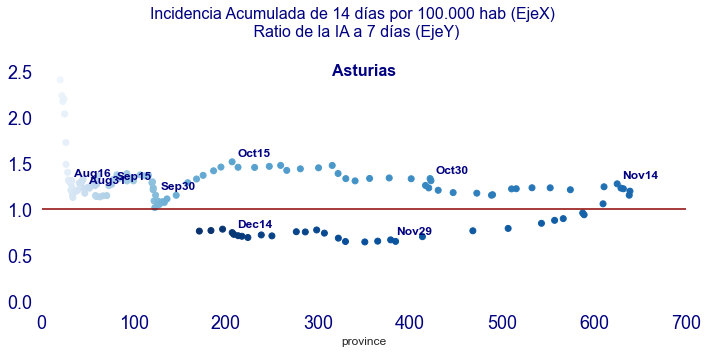

In [165]:
grafico_IA14_ratio_vs(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

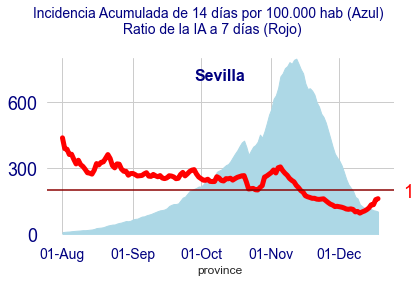

In [188]:
grafico_IA14_ratio(datos,campos,['Sevilla'],'sevilla')

<Figure size 720x360 with 0 Axes>

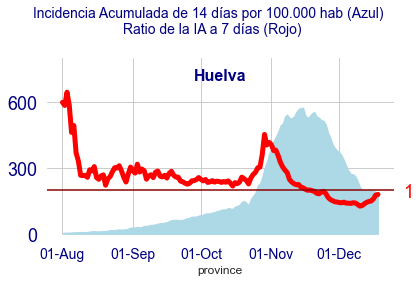

In [189]:
grafico_IA14_ratio(datos,campos,['Huelva'],'huelva')

<Figure size 720x360 with 0 Axes>

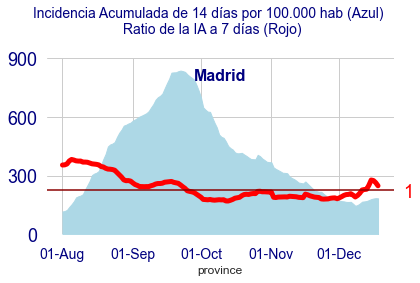

In [190]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

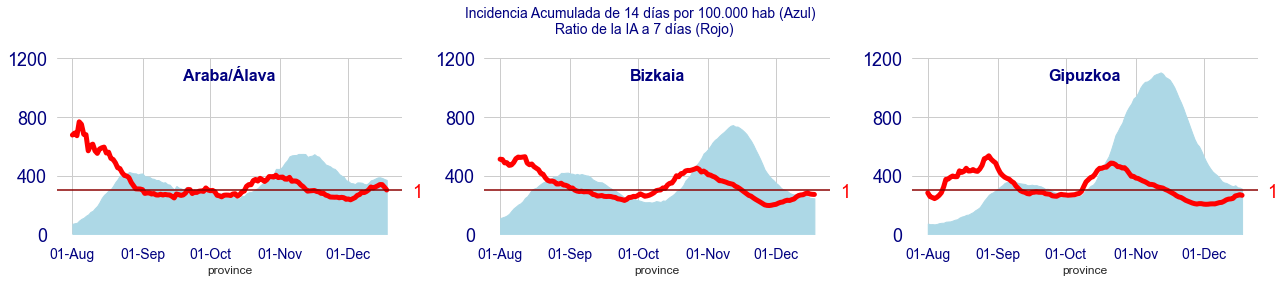

In [167]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

3 3.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<Figure size 1080x1080 with 0 Axes>

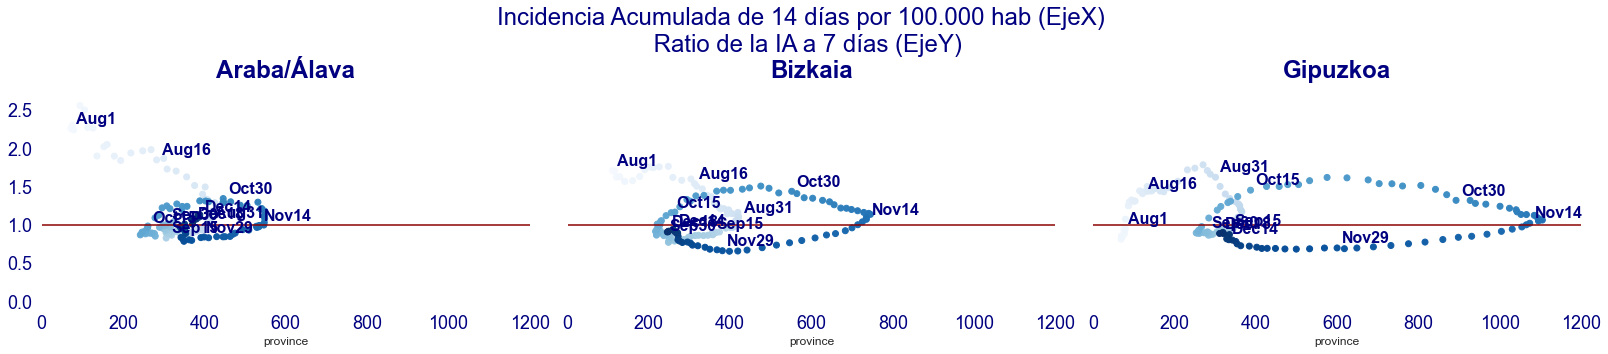

In [168]:
grafico_IA14_ratio_vs(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

1 2.0


<Figure size 1080x1080 with 0 Axes>

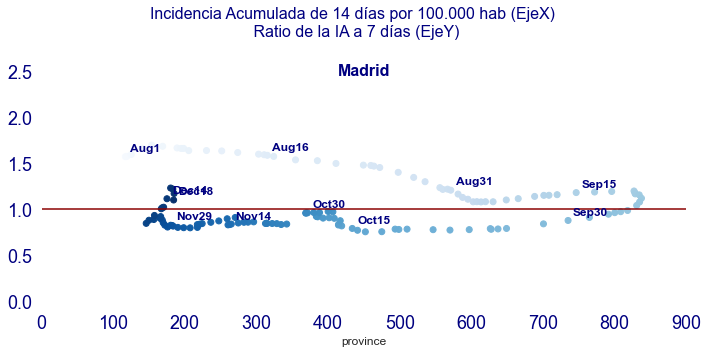

In [169]:
grafico_IA14_ratio_vs(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

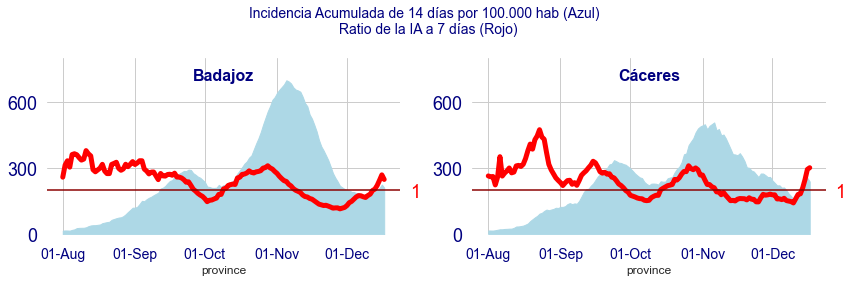

In [170]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

2 2.5


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<Figure size 1080x1080 with 0 Axes>

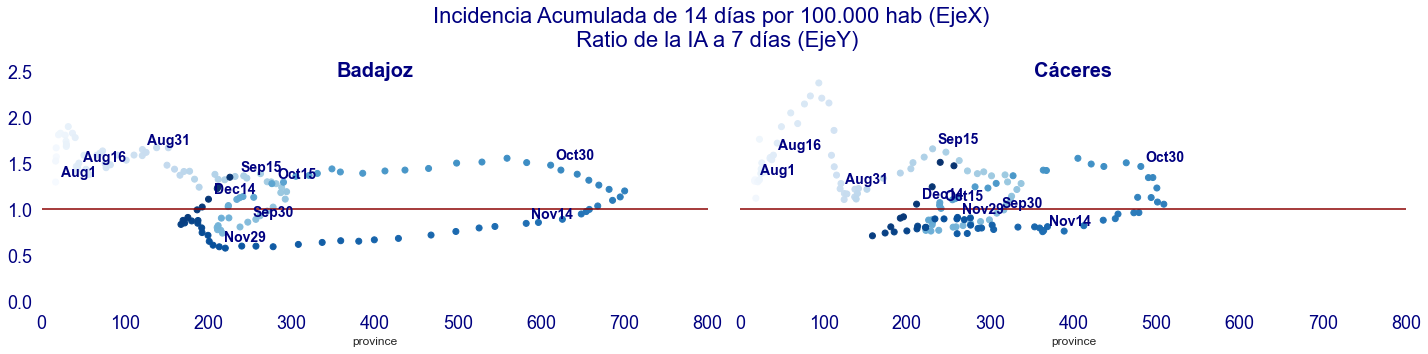

In [171]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz','Cáceres'],'extremadura')

1 2.0


<Figure size 1080x1080 with 0 Axes>

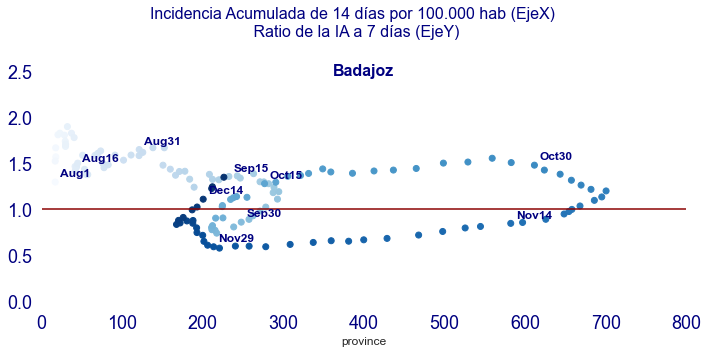

In [172]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz'],'badajoz')

1 2.5


<Figure size 1080x1080 with 0 Axes>

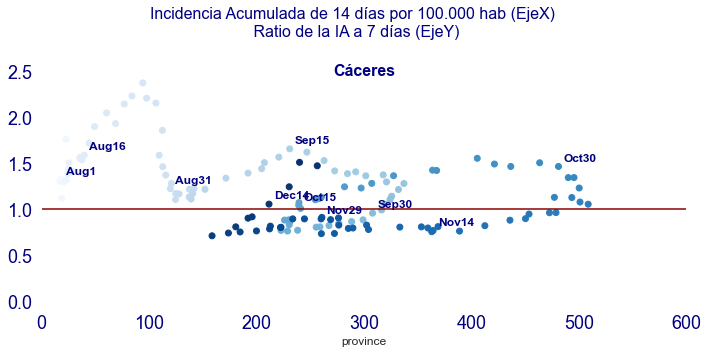

In [173]:
grafico_IA14_ratio_vs(datos,campos,['Cáceres'],'Caceres')

1 3.0


<Figure size 1080x1080 with 0 Axes>

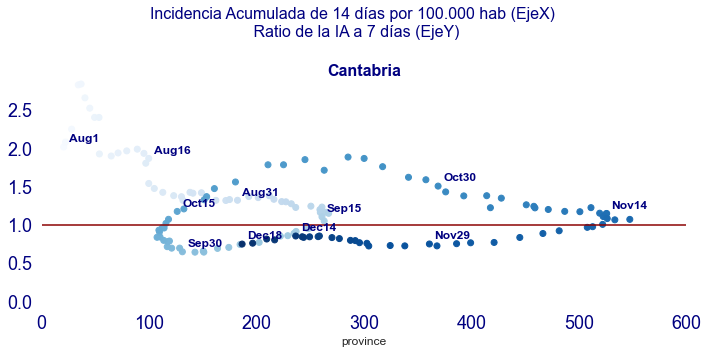

In [174]:
grafico_IA14_ratio_vs(datos,campos,['Cantabria'],'cantabria')

In [175]:
datos.loc[datos['province']=='Madrid']

date province  ine_code                  ccaa  new_cases  PCR  \
9494  2020-07-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9546  2020-07-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9598  2020-07-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9650  2020-07-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9702  2020-07-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9754  2020-07-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9806  2020-07-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9858  2020-07-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9910  2020-07-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9962  2020-07-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10014 2020-07-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10066 2020-07-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10118 2020-07-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10170 2020-07-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10222 2020-07-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10274 2020-07-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10326 2020-07-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10378 2020-07-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10430 2020-07-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10482 2020-07-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10534 2020-07-21   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10586 2020-07-22   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10638 2020-07-23   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10690 2020-07-24   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10742 2020-07-25   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10794 2020-07-26   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10846 2020-07-27   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10898 2020-07-28   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10950 2020-07-29   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11002 2020-07-30   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11054 2020-07-31   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11106 2020-08-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11158 2020-08-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11210 2020-08-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11262 2020-08-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11314 2020-08-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11366 2020-08-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11418 2020-08-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11470 2020-08-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11522 2020-08-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11574 2020-08-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11626 2020-08-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11678 2020-08-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11730 2020-08-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11782 2020-08-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11834 2020-08-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11886 2020-08-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11938 2020-08-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11990 2020-08-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12042 2020-08-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12094 2020-08-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12146 20

1 2.0


<Figure size 1080x1080 with 0 Axes>

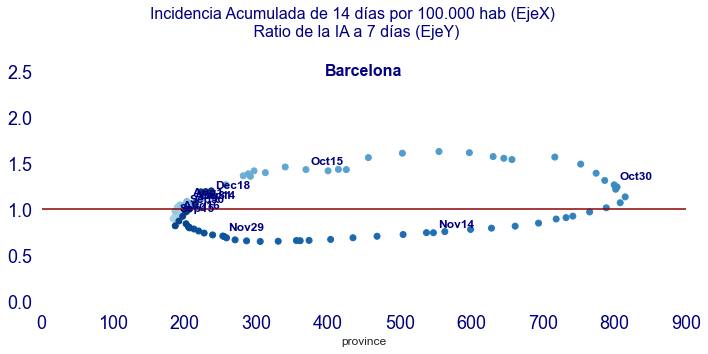

In [176]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona'],'barcelona')

2 2.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<Figure size 1080x1080 with 0 Axes>

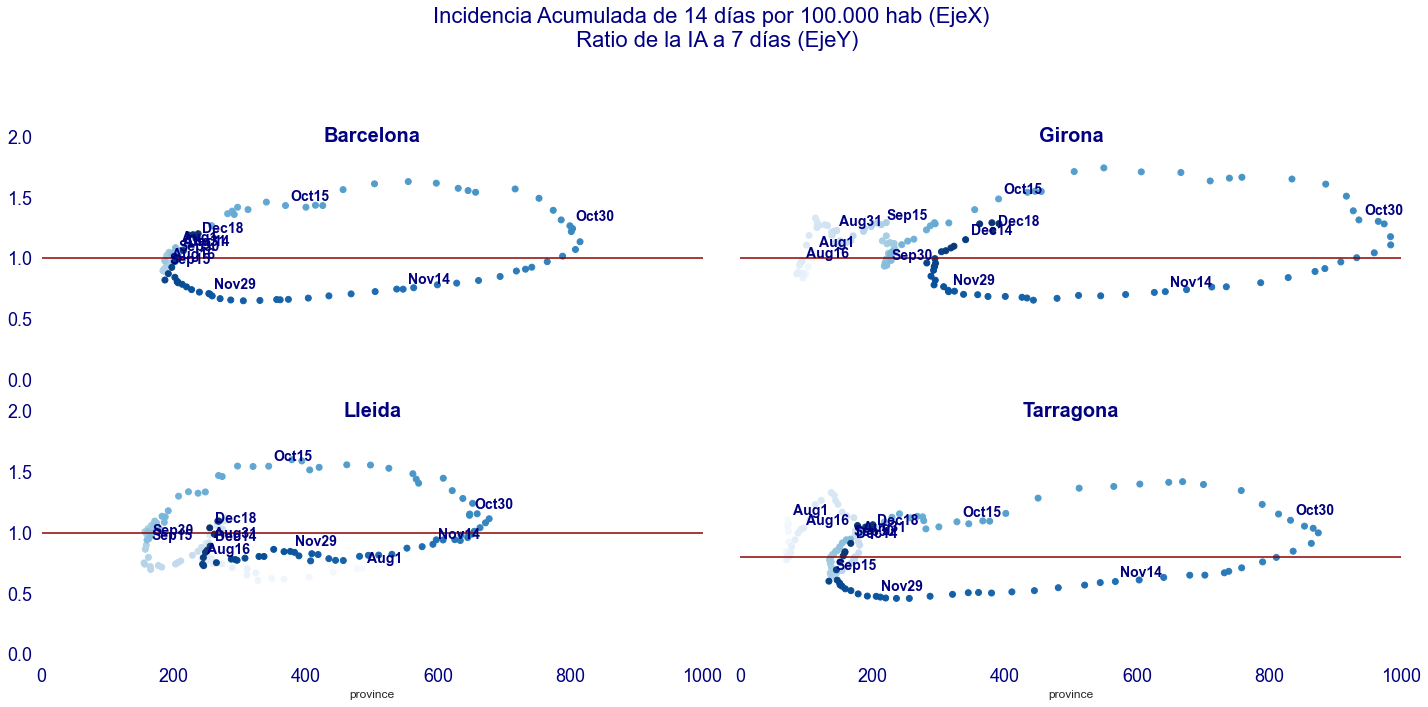

In [177]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

1 2


<Figure size 1080x1080 with 0 Axes>

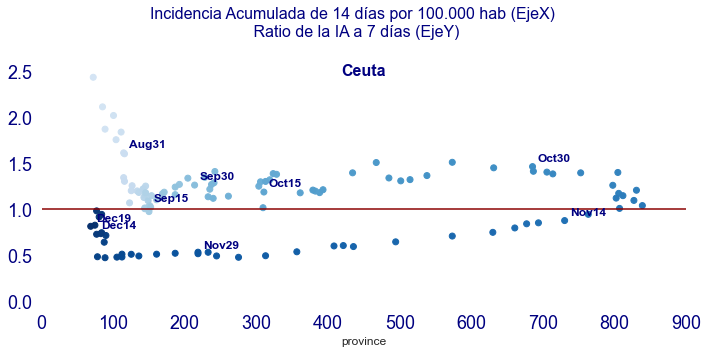

In [178]:
grafico_IA14_ratio_vs(datos,campos,['Ceuta'],'ceuta')

1 2


<Figure size 1080x1080 with 0 Axes>

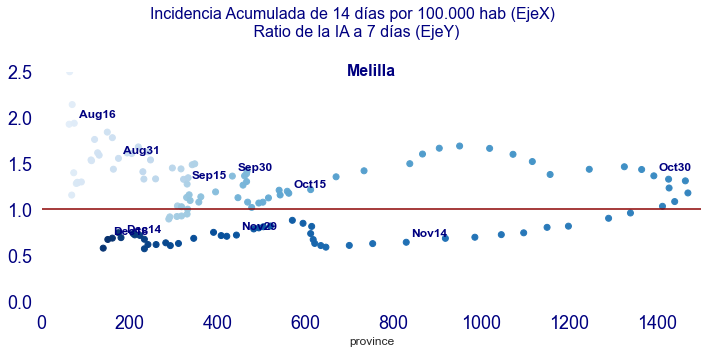

In [179]:
grafico_IA14_ratio_vs(datos,campos,['Melilla'],'melilla')

1 2.0


<Figure size 1080x1080 with 0 Axes>

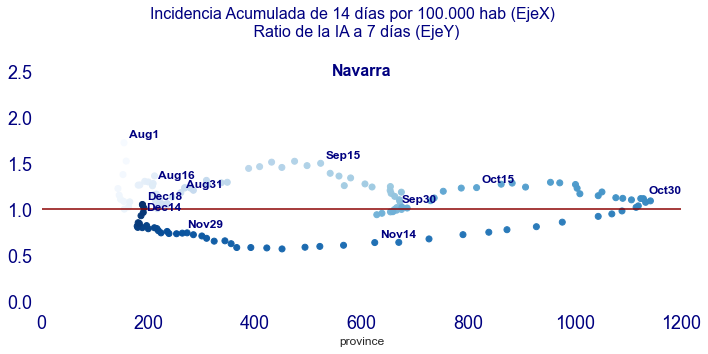

In [180]:
grafico_IA14_ratio_vs(datos,campos,['Navarra'],'navarra')

1 2


<Figure size 1080x1080 with 0 Axes>

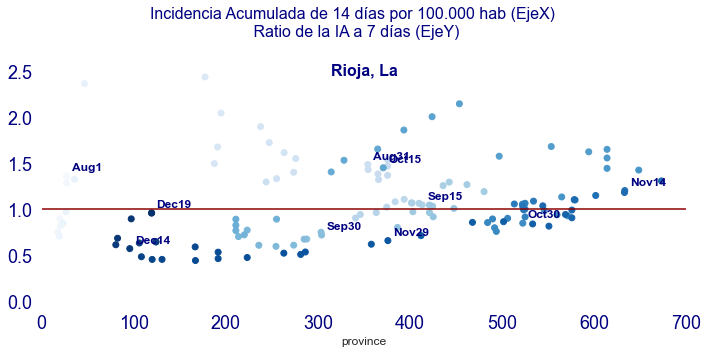

In [181]:
grafico_IA14_ratio_vs(datos,campos,['Rioja, La'],'rioja')

1 2.5


<Figure size 1080x1080 with 0 Axes>

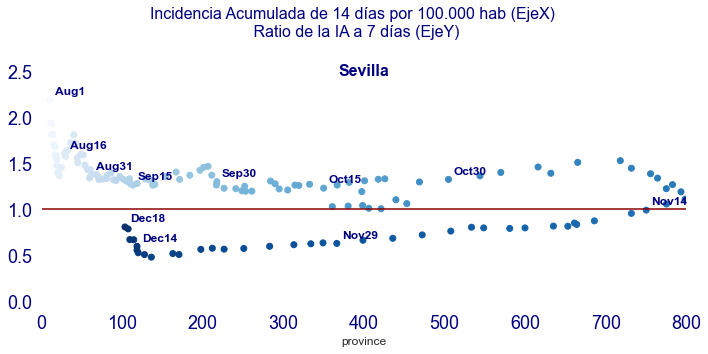

In [182]:
grafico_IA14_ratio_vs(datos,campos,['Sevilla'],'sevilla')

1 2


<Figure size 1080x1080 with 0 Axes>

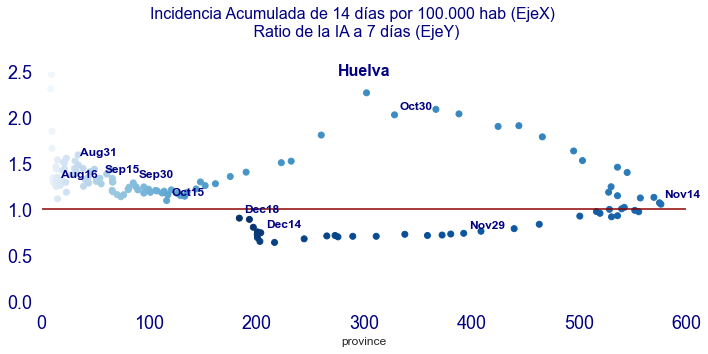

In [183]:
grafico_IA14_ratio_vs(datos,campos,['Huelva'],'huelva')

3 2.5


<Figure size 1080x1080 with 0 Axes>

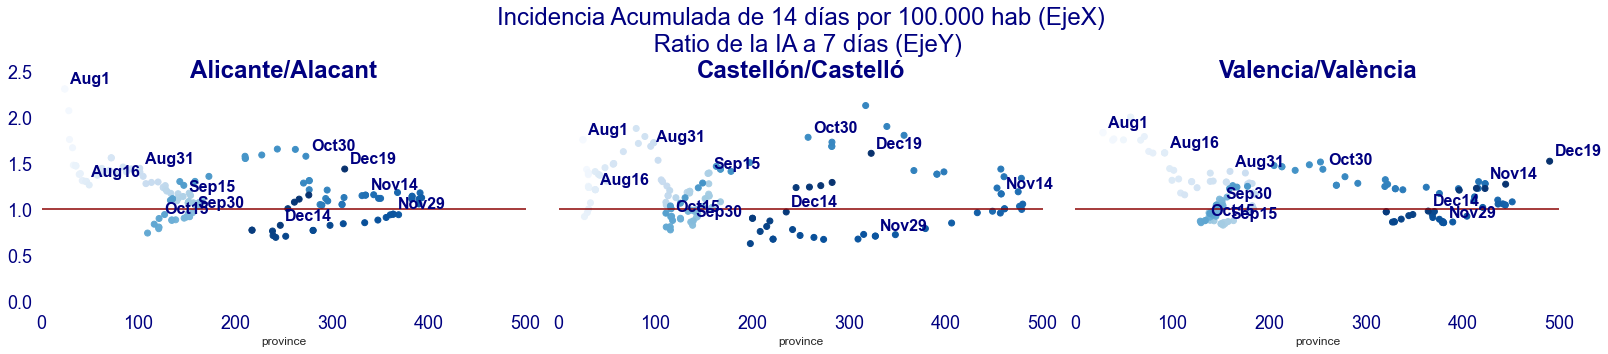

In [184]:
grafico_IA14_ratio_vs(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

3 2


<Figure size 1080x1080 with 0 Axes>

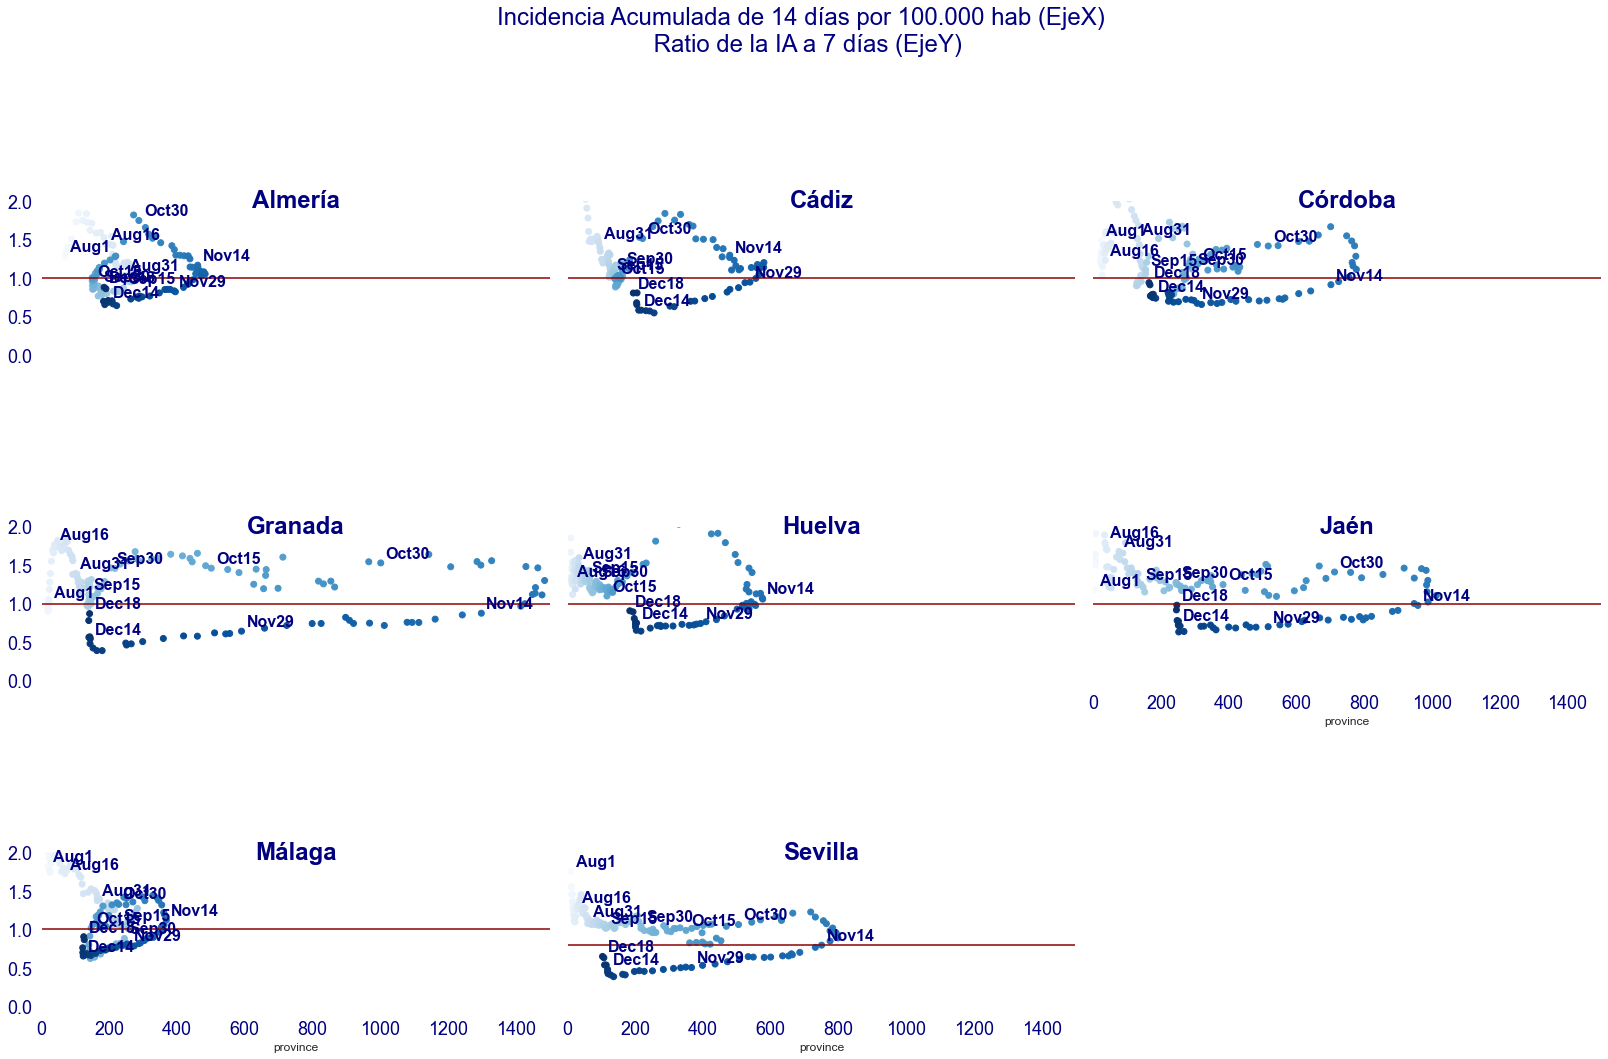

In [185]:
grafico_IA14_ratio_vs(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

In [186]:
datos.loc[datos['province']=='Melilla']

date province  ine_code     ccaa  new_cases    PCR  TestAc  \
9496  2020-07-01  Melilla        52  Melilla        0.0    0.0     0.0   
9548  2020-07-02  Melilla        52  Melilla        0.0    0.0     0.0   
9600  2020-07-03  Melilla        52  Melilla        0.0    0.0     0.0   
9652  2020-07-04  Melilla        52  Melilla        0.0    0.0     0.0   
9704  2020-07-05  Melilla        52  Melilla        0.0    0.0     0.0   
9756  2020-07-06  Melilla        52  Melilla        0.0    0.0     0.0   
9808  2020-07-07  Melilla        52  Melilla        0.0    0.0     0.0   
9860  2020-07-08  Melilla        52  Melilla        0.0    0.0     0.0   
9912  2020-07-09  Melilla        52  Melilla        0.0    0.0     0.0   
9964  2020-07-10  Melilla        52  Melilla        0.0    0.0     0.0   
10016 2020-07-11  Melilla        52  Melilla        0.0    0.0     0.0   
10068 2020-07-12  Melilla        52  Melilla        0.0    0.0     0.0   
10120 2020-07-13  Melilla        52  Melilla        0.0    0.0     0.0   
10172 2020-07-14  Melilla        52  Melilla        0.0    0.0     0.0   
10224 2020-07-15  Melilla        52  Melilla        0.0    0.0     0.0   
10276 2020-07-16  Melilla        52  Melilla        0.0    0.0     0.0   
10328 2020-07-17  Melilla        52  Melilla        0.0    0.0     0.0   
10380 2020-07-18  Melilla        52  Melilla        0.0    0.0     0.0   
10432 2020-07-19  Melilla        52  Melilla        0.0    0.0     0.0   
10484 2020-07-20  Melilla        52  Melilla        0.0    0.0     0.0   
10536 2020-07-21  Melilla        52  Melilla        0.0    0.0     0.0   
10588 2020-07-22  Melilla        52  Melilla        0.0    0.0     0.0   
10640 2020-07-23  Melilla        52  Melilla        0.0    0.0     0.0   
10692 2020-07-24  Melilla        52  Melilla        0.0    0.0     0.0   
10744 2020-07-25  Melilla        52  Melilla        0.0    0.0     0.0   
10796 2020-07-26  Melilla        52  Melilla        0.0    0.0     0.0   
10848 2020-07-27  Melilla        52  Melilla        0.0    0.0     0.0   
10900 2020-07-28  Melilla        52  Melilla        0.0    0.0     0.0   
10952 2020-07-29  Melilla        52  Melilla        0.0    0.0     0.0   
11004 2020-07-30  Melilla        52  Melilla        0.0    3.0     0.0   
11056 2020-07-31  Melilla        52  Melilla        0.0    5.0     0.0   
11108 2020-08-01  Melilla        52  Melilla        0.0    2.0     0.0   
11160 2020-08-02  Melilla        52  Melilla        0.0    0.0     0.0   
11212 2020-08-03  Melilla        52  Melilla        0.0    1.0     0.0   
11264 2020-08-04  Melilla        52  Melilla        0.0    4.0     0.0   
11316 2020-08-05  Melilla        52  Melilla        0.0    4.0     0.0   
11368 2020-08-06  Melilla        52  Melilla        0.0    3.0     0.0   
11420 2020-08-07  Melilla        52  Melilla        0.0    6.0     0.0   
11472 2020-08-08  Melilla        52  Melilla        0.0    0.0     0.0   
11524 2020-08-09  Melilla        52  Melilla        0.0    5.0     0.0   
11576 2020-08-10  Melilla        52  Melilla        0.0   12.0     0.0   
11628 2020-08-11  Melilla        52  Melilla        0.0    6.0     0.0   
11680 2020-08-12  Melilla        52  Melilla        0.0    2.0     0.0   
11732 2020-08-13  Melilla        52  Melilla        0.0    5.0     0.0   
11784 2020-08-14  Melilla        52  Melilla        0.0    4.0     0.0   
11836 2020-08-15  Melilla        52  Melilla        0.0    8.0     0.0   
11888 2020-08-16  Melilla        52  Melilla        0.0    4.0     0.0   
11940 2020-08-17  Melilla        52  Melilla        0.0    0.0     0.0   
11992 2020-08-18  Melilla        52  Melilla        0.0    0.0     0.0   
12044 2020-08-19  Melilla        52  Melilla        0.0   13.0     0.0   
12096 2020-08-20  Melilla        52  Melilla        0.0    6.0     0.0   
12148 2020-08-21  Melilla        52  Melilla        0.0    5.0     0.0   
12200 2020-08-22  Melilla        52  Melilla        0.0    8.0     0.0   
12252 2020-08-23